In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.normal(loc=5, scale=2, size=10) #drawing random samples
#loc specifies mean, scale is sd

array([ 6.19081971,  6.74730027, -0.1976994 ,  1.17851666,  5.40121569,
        3.58879675,  4.53995885,  6.19985277,  4.7267873 ,  6.58702219])

# Visualising random numbers

Text(0, 0.5, 'Value of random number')

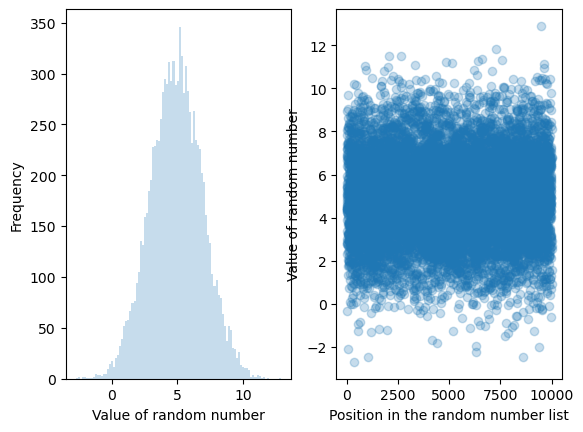

In [6]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

In [7]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 69.47%


# Brownian motion in 1D

## Simulation

In [ ]:
import numpy.random as rnd

In [40]:
#Brownian motion in 1D, where it can either take 1 unit to the left or right, which is selected randomly. probability of going right = p, left = q(=1-p)
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1 #either 1 step to right or left
    x = 0 # starting x position

    for _ in range(no_of_steps): #keep looping till no. of steps is ran finish
        if rnd.random() < prob_right:   # rnd.random() is rng for 0-1. if rng < 0.5, add 1 to x. Denote 1 movement unit to right
            x += step_size
        else:
            x -= step_size

    return x

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

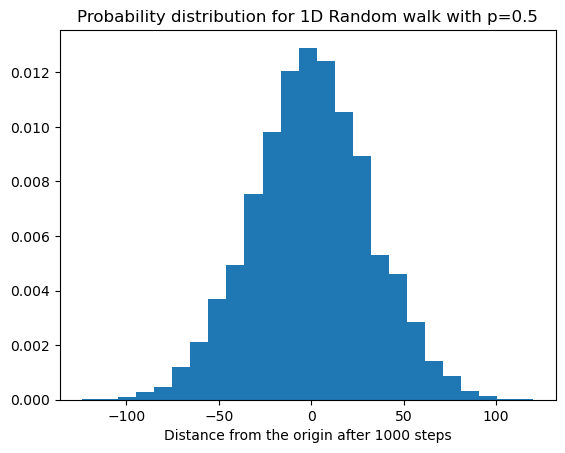

In [45]:
no_of_steps, p = 1_000, .5 #changing p higher will skew distribution to right
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True) #density=True normalises area under curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

In [35]:
#function for normal distribution
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

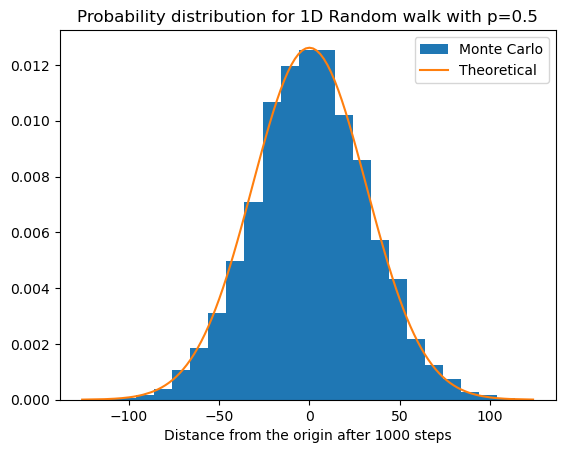

In [56]:
no_of_steps, p = 1_000, .5 #changing p higher will skew distribution to right
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True, label = 'Monte Carlo') #density=True normalises area under curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.legend(loc = 'upper right')

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc = 'upper right')

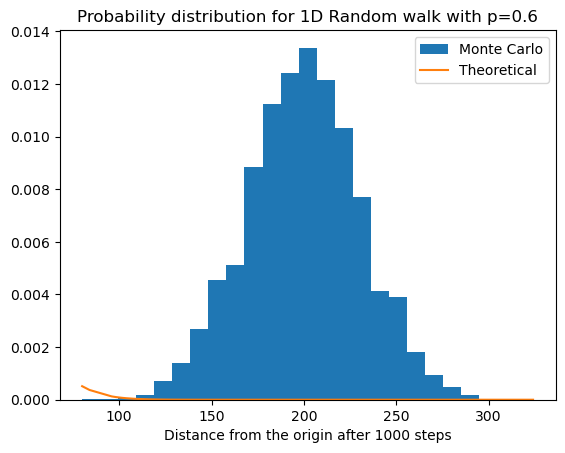

In [59]:
#for .6, gold line broken
no_of_steps, p = 1_000, .6 #changing p higher will skew distribution to right
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True, label = 'Monte Carlo') #density=True normalises area under curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.legend(loc = 'upper right')

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form the x-axis

plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc = 'upper right')

# Estimating pi

In [63]:
#throwing of sand grain 1 at a time, calculating 1. whether it lands on the circle and 2. surface area of sand covering the circle
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1) 
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

#not encouraged, slower

3.13748

In [65]:
#ideal solution
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.142972

## Smarter solution in calculating pi

In [66]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total) #range of x and y kept between 0 and 1 by using rand, improves the statistic.
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.143596